<a href="https://colab.research.google.com/github/iapucci/Insurance_exercicio/blob/main/Insurance_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício de machine learning

Use todo o seu conhecimento adquirido até então para encontrar:
o modelo para a variavel resposta 'smoker' em relação a métrica F1-Score;


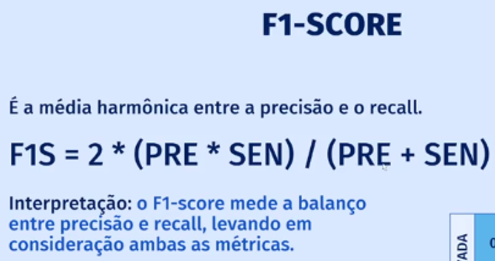

F1: média harmônica da sensibilidade e precisão

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
dados = pd.read_csv(url)

dados.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [2]:
dados.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [3]:
#análise exploratória de dados em função da variável smoker
!pip install sweetviz
import sweetviz as sv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 34.0 MB/s eta 0:00:00


In [4]:
eda = sv.analyze(source = dados,
                 target_feat = 'smoker')

                                             |          | [  0%]   00:00 -> (? left)


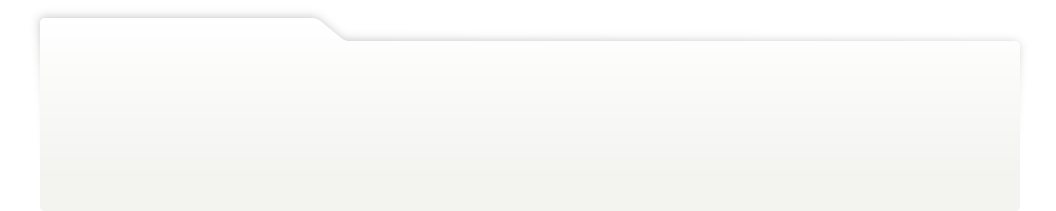
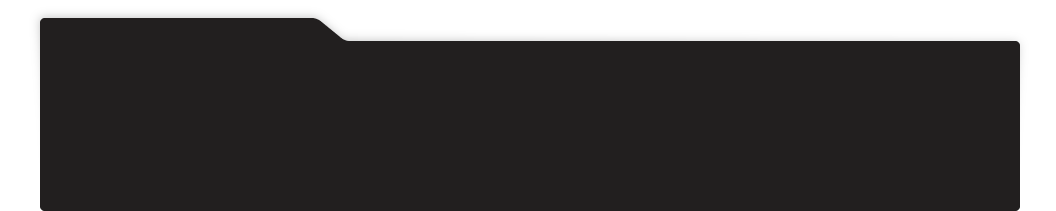
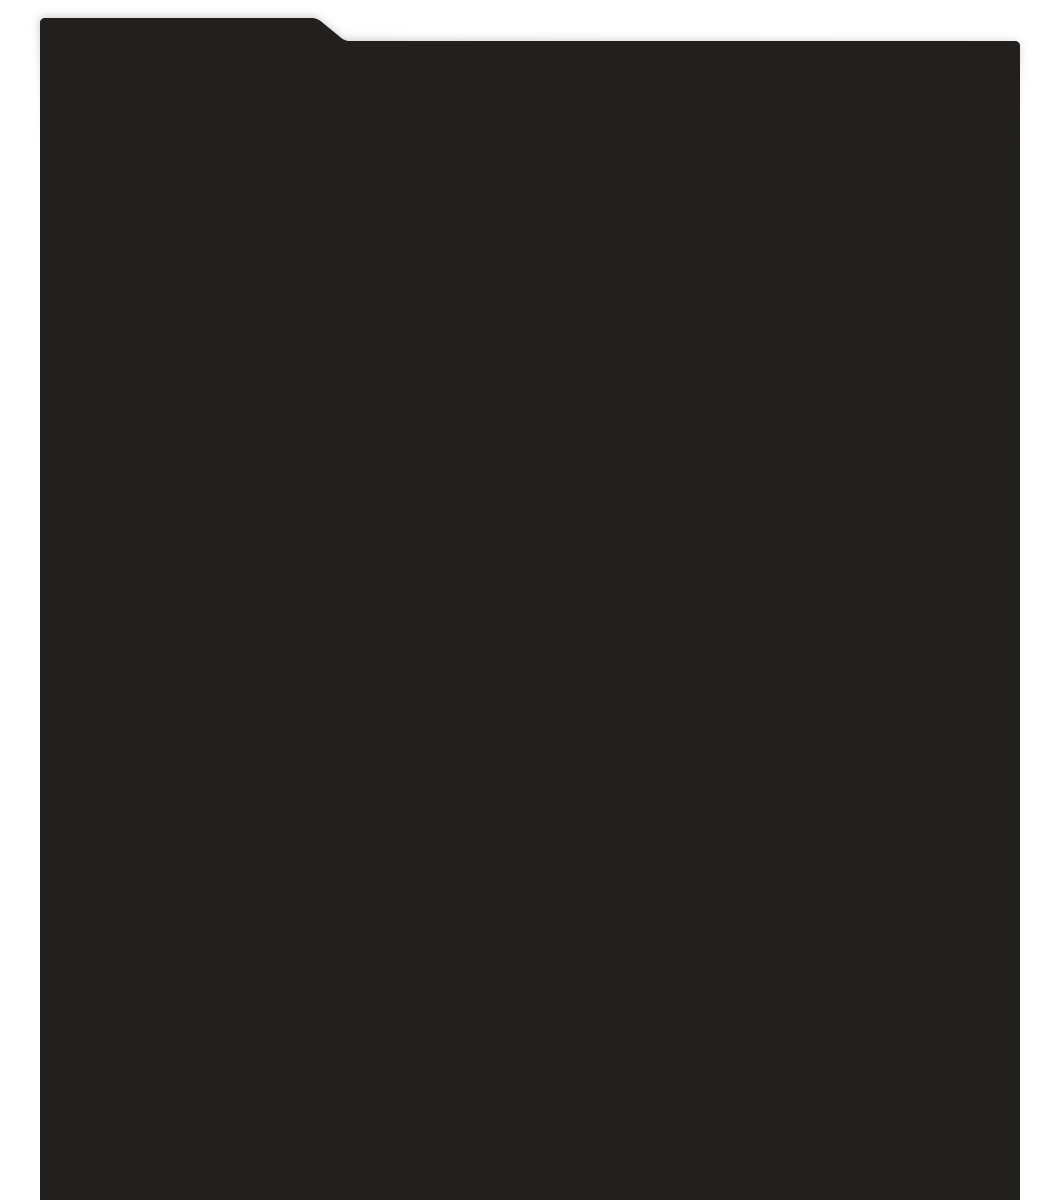
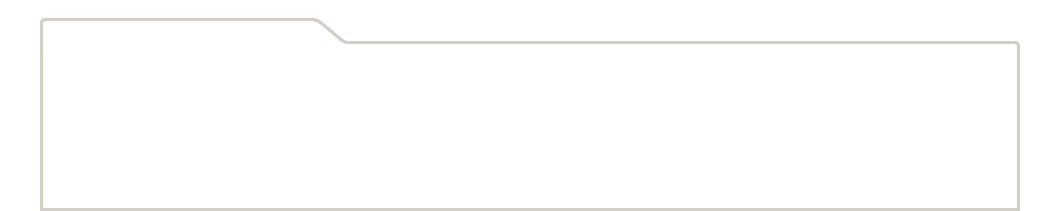
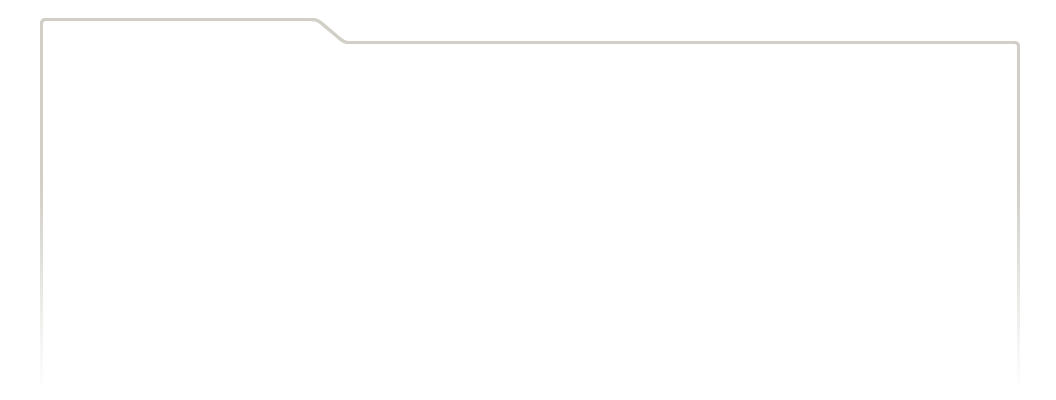
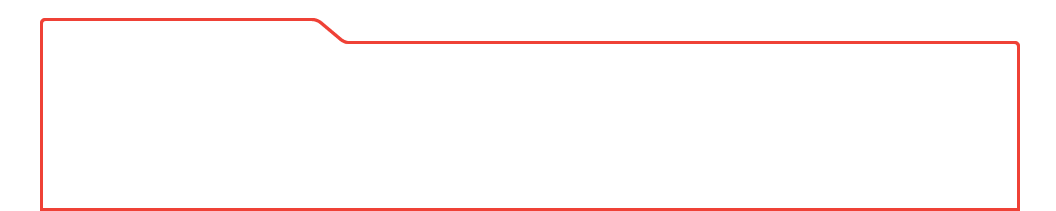
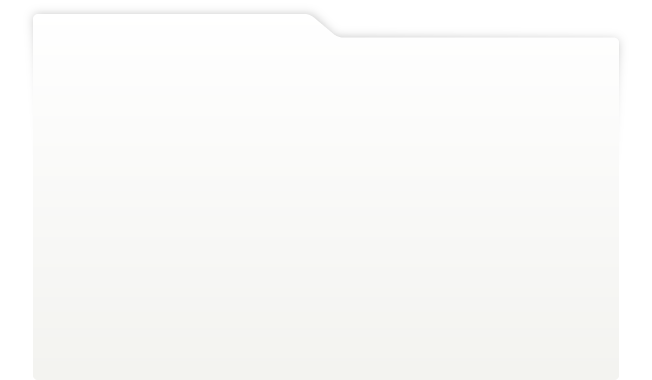
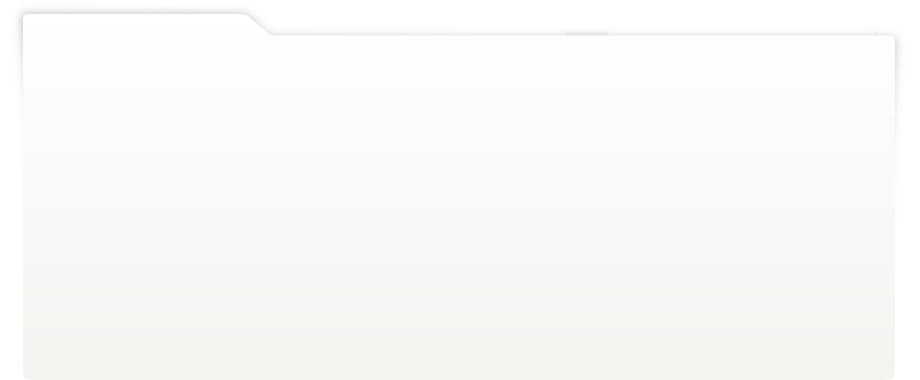
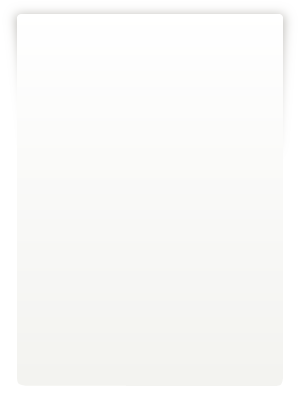
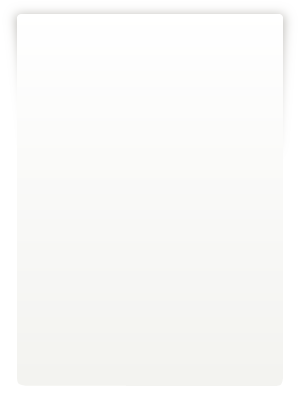
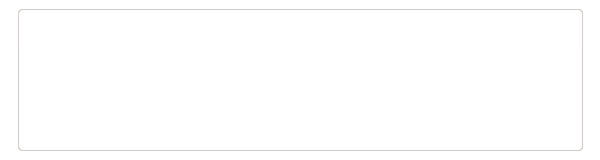
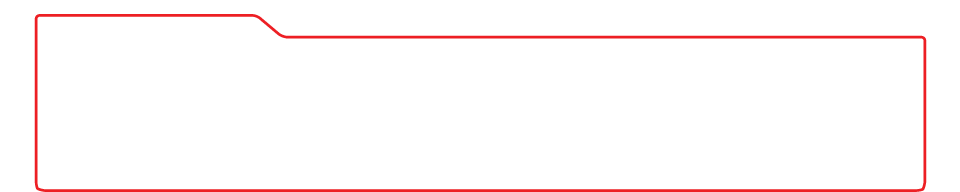
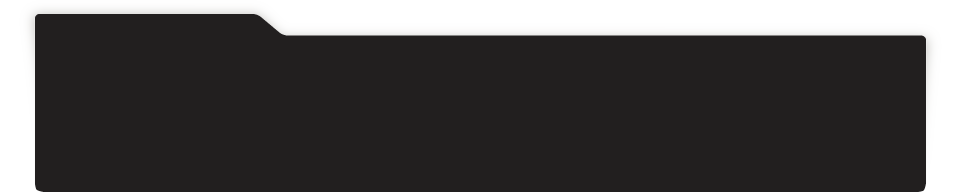
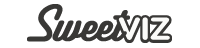
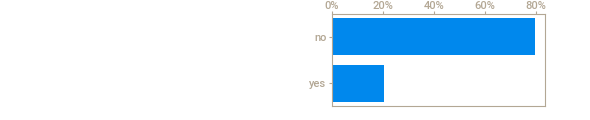
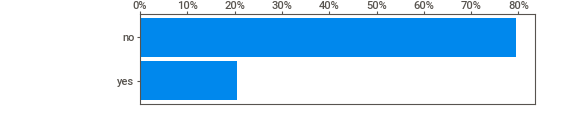
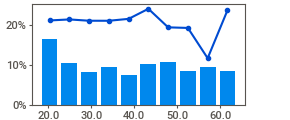
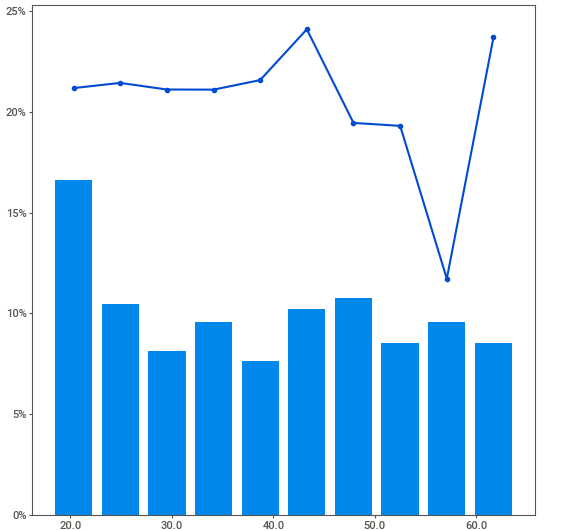
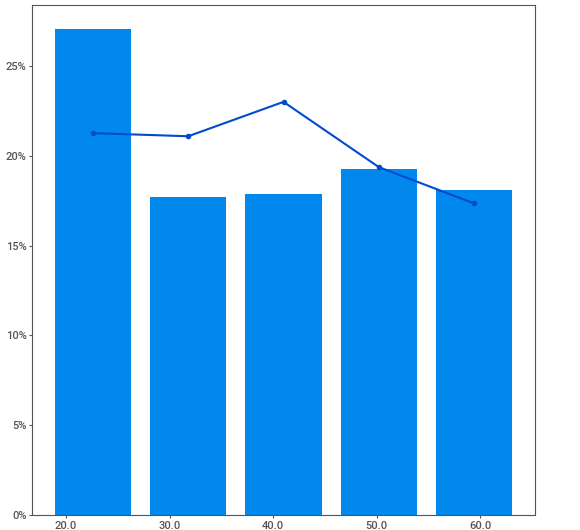
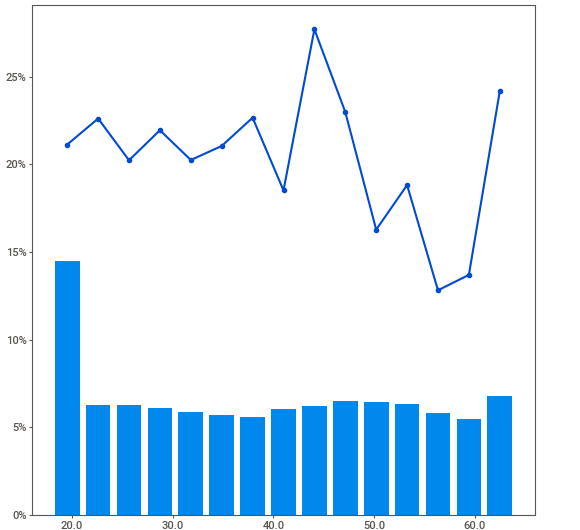
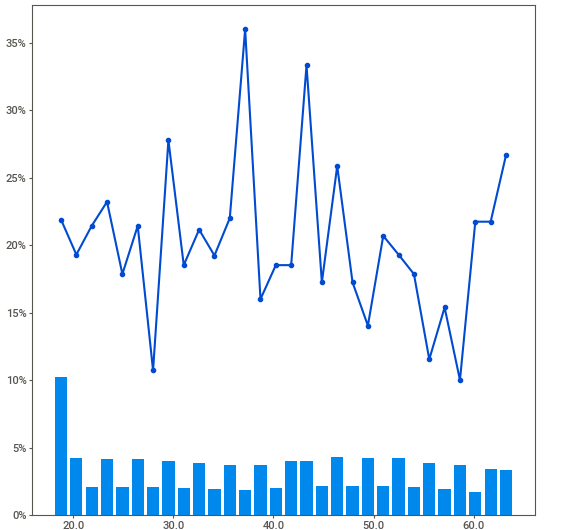
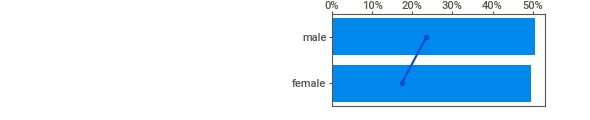
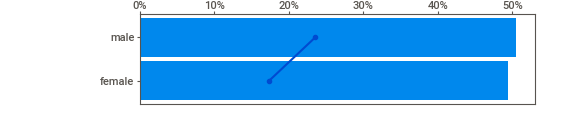
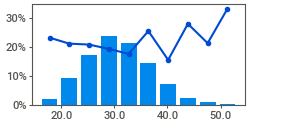
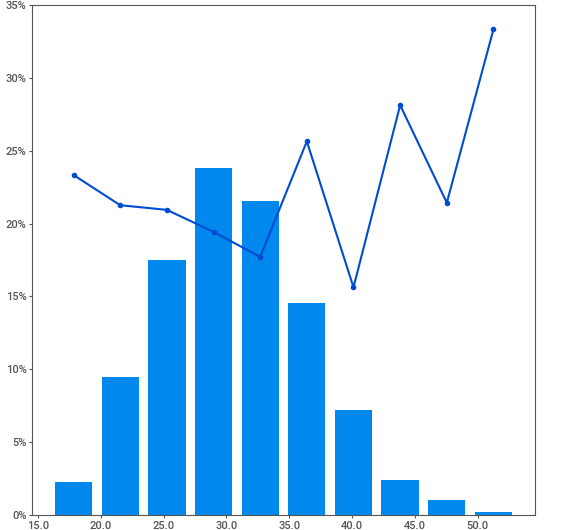
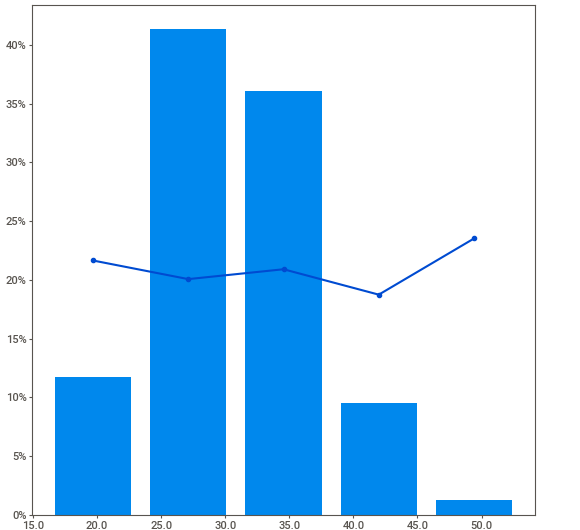
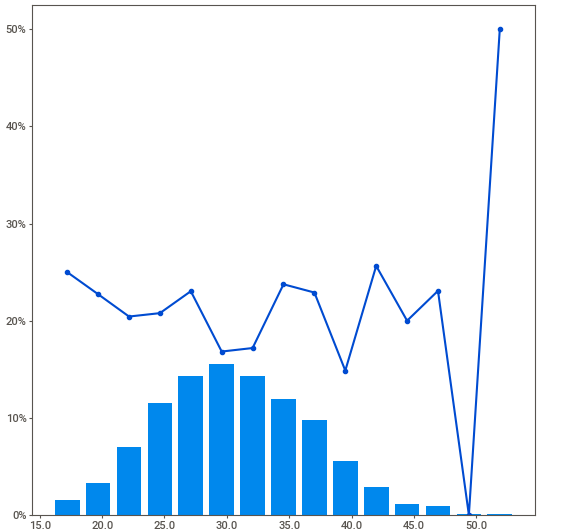
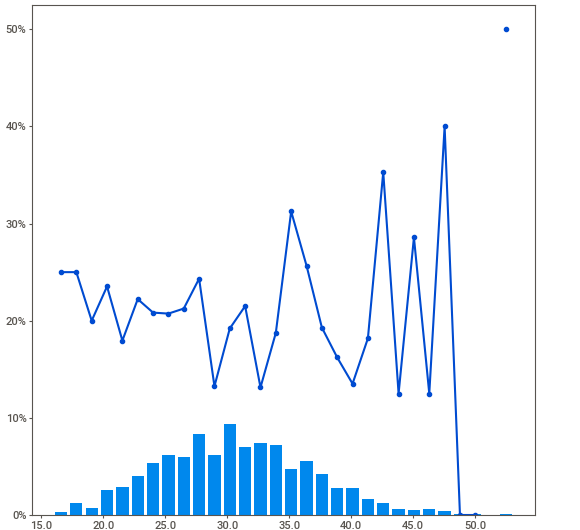
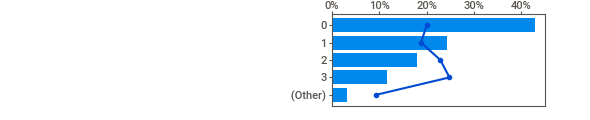
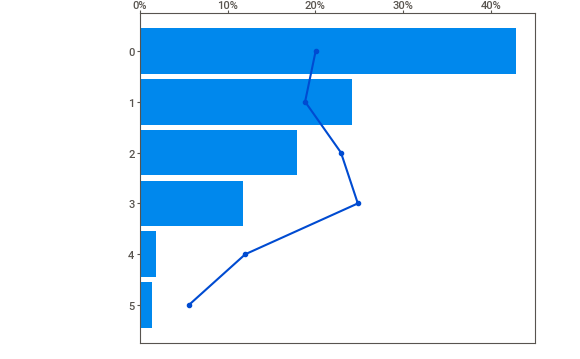
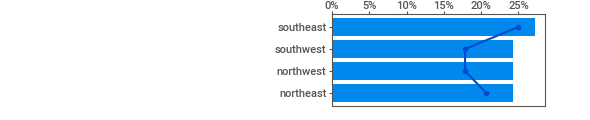
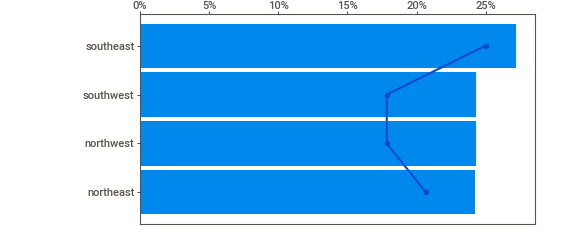
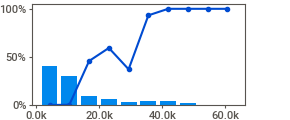
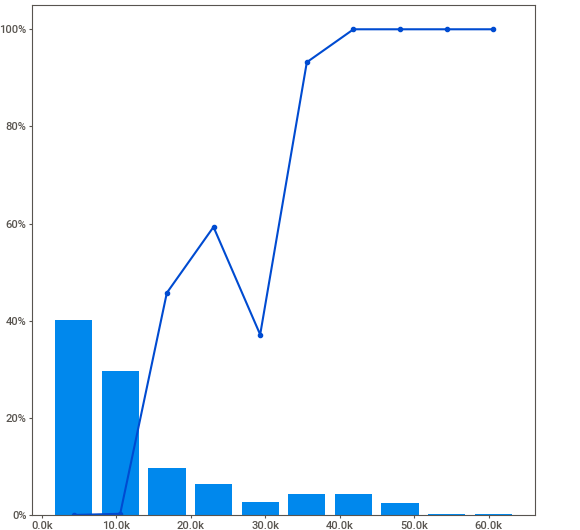
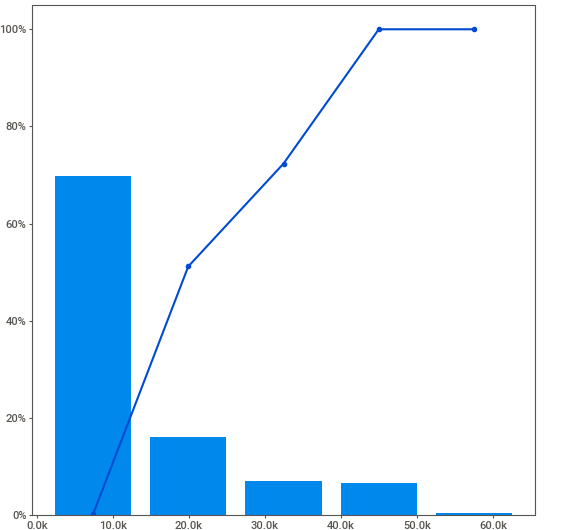
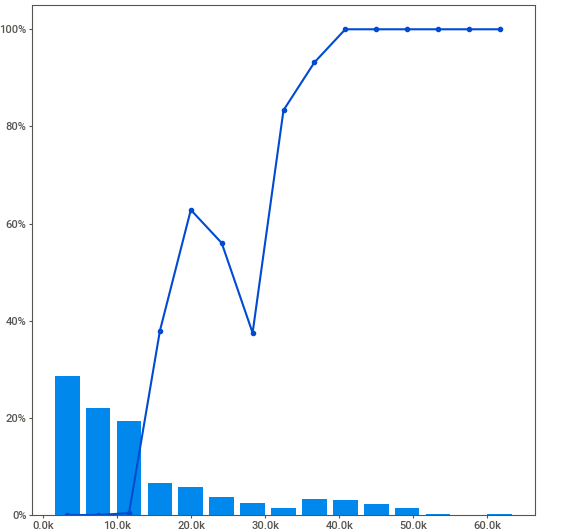
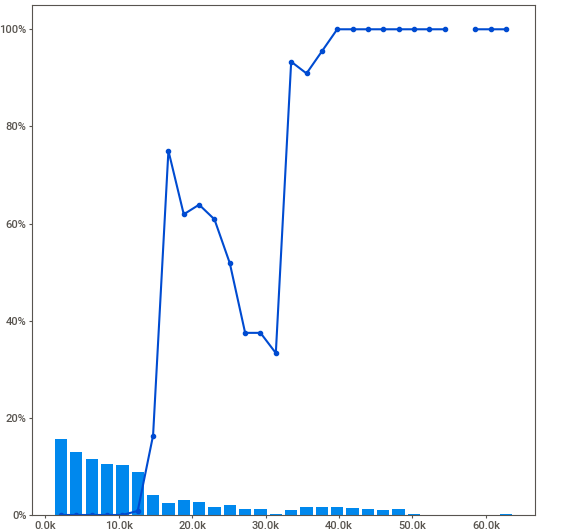
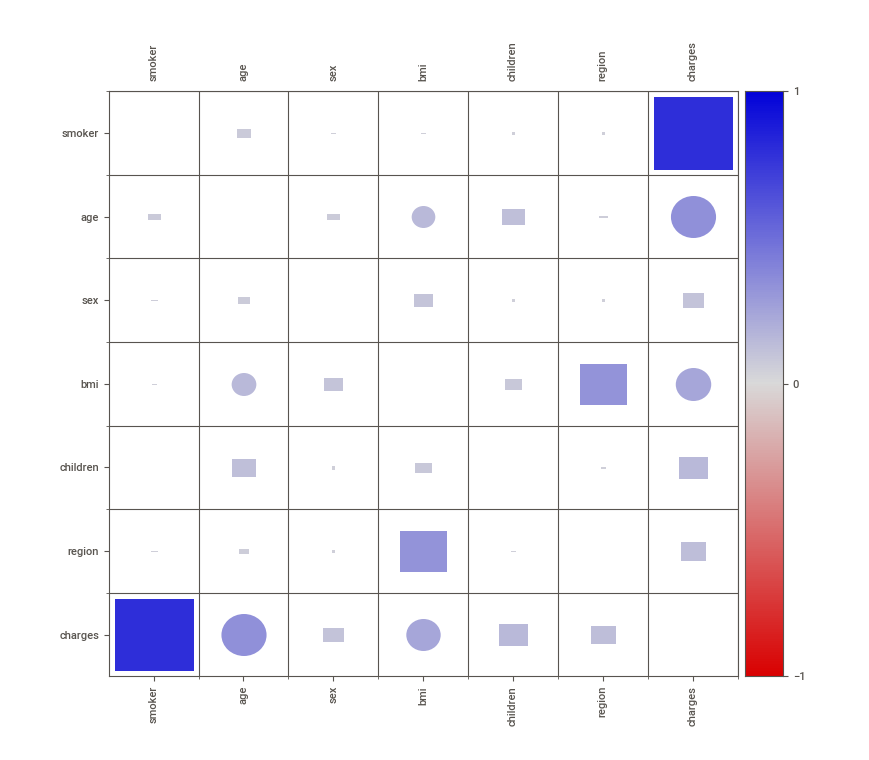
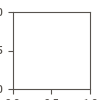

In [5]:
eda.show_notebook()

In [6]:
#pré-processamento

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges']/1000
dados = dados[['bmi', 'smoker', 'charges','age', 'sex', 'children', 'region']]
dados.head()

,bmi,smoker,charges,age,sex,children,region
0,27.900,1,16.884924,19,female,0,southwest
1,33.770,0,1.725552,18,male,1,southeast
2,33.000,0,4.449462,28,male,3,southeast
3,22.705,0,21.984471,33,male,0,northwest
4,28.880,0,3.866855,32,male,0,northwest


In [7]:
variaveis_cat = ['region', 'sex']

dados = pd.get_dummies(dados, columns = variaveis_cat, drop_first = True)

In [8]:
dados.head(10)

,bmi,smoker,charges,age,children,region_northwest,region_southeast,region_southwest,sex_male
0,27.900,1,16.884924,19,0,0,0,1,0
1,33.770,0,1.725552,18,1,0,1,0,1
2,33.000,0,4.449462,28,3,0,1,0,1
3,22.705,0,21.984471,33,0,1,0,0,1
4,28.880,0,3.866855,32,0,1,0,0,1
5,25.740,0,3.756622,31,0,0,1,0,0
6,33.440,0,8.240590,46,1,0,1,0,0
7,27.740,0,7.281506,37,3,1,0,0,0
8,29.830,0,6.406411,37,2,0,0,0,1
9,25.840,0,28.923137,60,0,1,0,0,0


In [9]:
import numpy as np

media = np.mean(dados['age'])
desvio = np.std(dados['age'])

dados['age'] = (dados['age'] - media) /desvio

<Axes: ylabel='Frequency'>

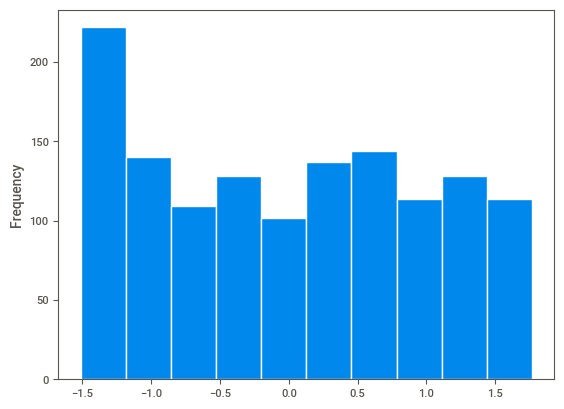

In [10]:
dados['age'].plot(kind = 'hist', edgecolor = 'white')

In [11]:
media = np.mean(dados['bmi'])
desvio = np.std(dados['bmi'])

dados['bmi'] = (dados['bmi'] - media) /desvio

<Axes: ylabel='Frequency'>

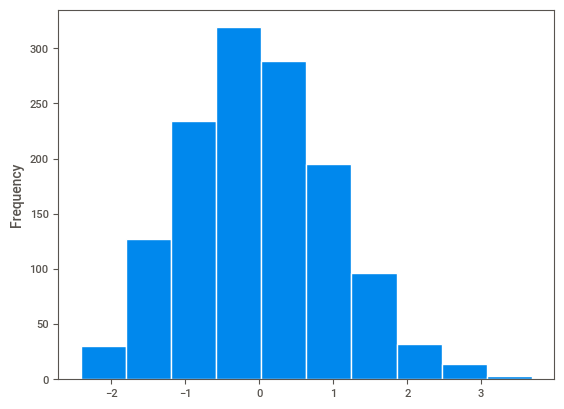

In [12]:
dados['bmi'].plot(kind = 'hist', edgecolor = 'white')

In [13]:
dados.head()

,bmi,smoker,charges,age,children,region_northwest,region_southeast,region_southwest,sex_male
0,-0.453320,1,16.884924,-1.438764,0,0,0,1,0
1,0.509621,0,1.725552,-1.509965,1,0,1,0,1
2,0.383307,0,4.449462,-0.797954,3,0,1,0,1
3,-1.305531,0,21.984471,-0.441948,0,1,0,0,1
4,-0.292556,0,3.866855,-0.513149,0,1,0,0,1


In [21]:
#importando os modelos para iniciar o machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [18]:
#importando a validação

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

validacao = RepeatedKFold(n_splits = 10, n_repeats = 3)

In [22]:
#definir a variável resposta e variável explicativa

X = dados.drop('smoker', axis = 1 )
y = dados['smoker']
print(X)

           bmi    charges       age  children  region_northwest  \
0    -0.453320  16.884924 -1.438764         0                 0   
1     0.509621   1.725552 -1.509965         1                 0   
2     0.383307   4.449462 -0.797954         3                 0   
3    -1.305531  21.984471 -0.441948         0                 1   
4    -0.292556   3.866855 -0.513149         0                 1   
...        ...        ...       ...       ...               ...   
1333  0.050297  10.600548  0.768473         3                 1   
1334  0.206139   2.205981 -1.509965         0                 0   
1335  1.014878   1.629833 -1.509965         0                 0   
1336 -0.797813   2.007945 -1.296362         0                 0   
1337 -0.261388  29.141360  1.551686         0                 1   

      region_southeast  region_southwest  sex_male  
0                    0                 1         0  
1                    1                 0         1  
2                    1              

In [23]:
lista_de_medidas = ['accuracy', 'recall', 'precision', 'f1']
nome_das_medidas = ['acurácia', 'sensibilidade (recall)', 'precisão', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=100, max_depth = 3),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 9),
                        RandomForestClassifier(n_estimators=50, max_depth = 3),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=50, max_depth = 9)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 100, prof = 3)',
                        'Random Forest (arvs = 100, prof = 5)',
                        'Random Forest (arvs = 100, prof = 7)',
                        'Random Forest (arvs = 100, prof = 9)',
                        'Random Forest (arvs = 50, prof = 3)',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 50, prof = 9)']

resultados0 = {}

validacao = StratifiedKFold(n_splits = 10)


for i in range(len(lista_de_modelos)):
    print('Rodando modelo: ' + nome_dos_modelos[i])
    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s]

resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T


Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging
Rodando modelo: Random Forest (arvs = 100, prof = 3)
Rodando modelo: Random Forest (arvs = 100, prof = 5)
Rodando modelo: Random Forest (arvs = 100, prof = 7)
Rodando modelo: Random Forest (arvs = 100, prof = 9)
Rodando modelo: Random Forest (arvs = 50, prof = 3)
Rodando modelo: Random Forest (arvs = 50, prof = 5)
Rodando modelo: Random Forest (arvs = 50, prof = 7)
Rodando modelo: Random Forest (arvs = 50, prof = 9)


In [24]:
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade (recall),precisão,f1-score
Bagging,0.968606,0.930423,0.922491,0.924307
Árvore (prof = 7),0.967866,0.941799,0.908097,0.923445
Árvore (prof = 3),0.964129,0.970899,0.873567,0.918670
5-NN,0.964123,0.967593,0.874340,0.917968
Árvore (prof = 5),0.960380,0.933995,0.882480,0.906517
Regressão Logística,0.955914,0.923016,0.876710,0.896332
"Random Forest (arvs = 100, prof = 9)",0.955179,0.923810,0.872651,0.895540
"Random Forest (arvs = 50, prof = 9)",0.953698,0.930952,0.859835,0.892819
"Random Forest (arvs = 50, prof = 7)",0.953675,0.923413,0.865449,0.892382
"Random Forest (arvs = 50, prof = 5)",0.951425,0.930820,0.851469,0.888335
